# Исследование надежности заемщиков

## Обзор данных

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/data.csv')
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB



При просмотре таблицы  внимание сразу фокусируется на отрицательных значениях столбца `days_employed`, а так же видим что столбец `total_income` имеет неудачный тип данных `float64` для работы с данными(сравнения,заполнения пропусков и пр.). Так же присутствуют пустые ячейки в обоих столбцах `days_employed` и `total_income`. Приступим к обработке данных.


###  Заполнение пропусков и проверка данных на аномалии

In [3]:
df.isna().mean()

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

Используя метод `isna()`, обнаружены пробелы в основной таблице `df`. 

Доля пропусков в столбцах `days_emploed` и `total_income` составила **0,101**.

*Можно предположить, что данные в столбцах `days_employed` и `total_income` не заполнены  по причине отсутсвия трудовой деятельности клиента на момент формирования данной выгрузки.*

Обратим внимание на данные в `days_employed`: в столбце есть отрицательные значения. Возьмем среднюю по сгруппированным по `income_type` столбцам, проверим, везде ли присутствует минус.

In [4]:
df.groupby('income_type')['days_employed'].mean()

income_type
безработный        366413.652744
в декрете           -3296.759962
госслужащий         -3399.896902
компаньон           -2111.524398
пенсионер          365003.491245
предприниматель      -520.848083
сотрудник           -2326.499216
студент              -578.751554
Name: days_employed, dtype: float64

Отрицательные значения присутствуют только у клиентов, работающих в данный момент.
В категории *пенсионер* и *безработный* данный показатель положительный. 

Могу предположить, что для работающих клиентов столбец `days_employed` является результатом вычитания текущего дня из дня, когда трудоустроился клиент. А для неработающих - посчитанная константа. 

Воспользуемся методом `agg()` и применим математическую функцию модуля `'abs'` к столбцу `days_employed`.

In [5]:
df['days_employed'] = df['days_employed'].agg(['abs'])
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Далее, обратим внимание на значения в ячейках столбца `days_employed`: например количество дней *340266.072047* из ячейки с индексом *4*.
Данные не соответствует реальности, ведь тогда 

**340266.072047 : 365 = 932 года** - стаж работы сотрудника, что не может быть правдой.


Предполагать, что все значения в столбце это часы, мы также не можем.
Для этого достаточно обратить внимание на минимальное значение по столбцу `days_employed` = *24.14163324048118*, и тогда, переведя данное число в дни, получим: 

**24.14163324048118 : 24 = 1.01 дней**

что означает, что клиент пропработал лишь день , и при этом его `total_income` составляет *166*тыс, что маловероятно. 

Отсюда я рискну предположить, что скорее всего в столбце содержатся значения и часов и дней.

Напишем функцию, которая будет определять что именно это за значения: 

In [6]:
#предположим что все таки в столбце days_employed есть значения и в часах и в днях, тогда напишем функцию,
#которая отличит дни от часов. полученный стаж в годах будем вычитать из возраста клиента. если разница будет менее 18
#(то есть клиенту на момент трудойтройства было меньше 18),  тогда ,будем понимать что это часы,иначе - дни.

def days_empl_func(value):
    time = value['days_employed'] / 365
    if value['dob_years'] - time < 18: 
        return value['days_employed'] / 24
    return value['days_employed']
#проверка работоспособности функции была проведена.не знаю надо ли это здесь отображать?        

df['days_employed'] = df.apply(days_empl_func,axis=1)#убедившись что функция работает верно, можно применить ее к изначальному столбцу и перезаписать значения на корректные. 

In [7]:
df.groupby('dob_years')['days_employed'].mean()

dob_years
0      2896.504379
19       66.923270
20      213.806070
21      423.649111
22      687.701751
23      682.172781
24      853.546233
25      905.619393
26     1167.344763
27     1297.489049
28     1332.564406
29     1391.093824
30     1601.018889
31     1576.443670
32     1722.873940
33     1844.806617
34     1917.445563
35     1980.065909
36     2151.492921
37     2193.458161
38     2287.321211
39     2340.447377
40     2393.813220
41     2451.961488
42     2799.285751
43     2616.787680
44     2734.291472
45     3055.343252
46     2979.185946
47     3156.449973
48     3306.055596
49     3738.783894
50     4526.929001
51     5084.490936
52     5832.085397
53     6110.069576
54     7160.744930
55     8296.909977
56     8263.787892
57     9599.449333
58     9381.056663
59    10813.607517
60    11929.023301
61    11379.944191
62    12162.903348
63    13064.947300
64    12819.442547
65    12826.601390
66    13617.535941
67    13670.378087
68    14105.341962
69    14369.789848
70

Из таблицы выше можно увидеть, что с увеличением возраста так же увеличивается рабочий стаж. Будем считать что данные верны.
Есть некие аномальные значения, в виде *0* в строке `dob_years`, но эти данные не должны повлиять на итоговые выводы. 

Данные из столбцов  `days_employed` и `total_income` считаются количественными данными(так как их можно сравнивать между собой).
Для получения общей картины по датасету и, во избежание ошибок при работе с данными, лучше будет заменить пропуски `NaN` на характерные для выборки значения - на среднее медианное(методом `median()`).

В данном случае не подойдет среднее арифметическое ,так как значения в столбцах сильно отличаются друг от друга. 



In [8]:
df['days_employed'] = df['days_employed'].fillna(df['days_employed'].median()) #используем метод fillna() для замены пропусков
df.isna().mean() # проверяем произведена ли замена 

children            0.000000
days_employed       0.000000
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

In [9]:
df['total_income'] = df['total_income'].fillna(df['total_income'].median()) #используем метод fillna() для замены пропусков
df.isna().mean() # проверяем произведена ли замена 

children            0.0
days_employed       0.0
dob_years           0.0
education           0.0
education_id        0.0
family_status       0.0
family_status_id    0.0
gender              0.0
income_type         0.0
debt                0.0
total_income        0.0
purpose             0.0
dtype: float64


Обратим внимание на столбец `children`, проверим есть ли в данном столбце какие либо аномалии:


In [10]:
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Аномальные значения здесь это *-1* и *20*. В сумме *123* строки, что не является и 1% от датасета обьемом в *21525* строк.

Мы можем удалить данные строки без вреда итоговым выводам, или можем написать фукнцию которая скорректирует данные. Я выбрала первый вариант.

А в реальности, лучше уточнить у источника данных почему такие ошибки были допущены и предотвратить их.

In [11]:
df = df[df['children'] != 20]
df = df[df['children'] != -1]
df['children'].value_counts()# проверяем удаление

0    14149
1     4818
2     2055
3      330
4       41
5        9
Name: children, dtype: int64

In [12]:
df.info()#видим, что размерность таблицы уменьшилась ровно на 123 строки

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21402 entries, 0 to 21524
Data columns (total 12 columns):
children            21402 non-null int64
days_employed       21402 non-null float64
dob_years           21402 non-null int64
education           21402 non-null object
education_id        21402 non-null int64
family_status       21402 non-null object
family_status_id    21402 non-null int64
gender              21402 non-null object
income_type         21402 non-null object
debt                21402 non-null int64
total_income        21402 non-null float64
purpose             21402 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ MB


### Изменение типов данных


Произведем замену типа данных в столбце `total_income` для удобства подсчета и восприятия данных.


In [13]:
df['total_income'] = df['total_income'].astype('int')
df.head()#проверяем сработал ли astype()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,234.309275,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


### Удаление дубликатов.

Проверим датасет на наличие явных и неявных дубликатов. 

В столбцах `children, days_employed , dob_years , education_id, family_status_id, debt, total_income` дубликатов быть не может, так как типы данных-численные. 

Проверим оставшиеся столбцы `education, ,family_status, gender, income_type, purpose` на дубликаты:

In [14]:
df['education'].unique()#есть над чем поработать

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

In [15]:
df['family_status'].unique()#all clear

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

In [16]:
df['gender'].unique()#all clear

array(['F', 'M', 'XNA'], dtype=object)

In [17]:
df['income_type'].unique()#all clear

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

In [18]:
df['purpose'].unique()#множество неявных дубликатов

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об


Сначала проведем работу над столбцом `education`. 

Предположительно, ошибка в данном столбце вызвана человеческим фактором.


In [19]:
df['education'] = df['education'].str.lower()#сделали все буквы строчными, дубликаты устранены
df['education'].unique()#проверяем уникальные значения.

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

Проведена работа с неявными дубликатами в таблице. Теперь рассмотрим наличие явных строк дубликатов в нашем датафрейме.

In [20]:
df[df.duplicated()] #выведем таблицу дубликатов

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,2048.094985,41,среднее,1,женат / замужем,0,F,сотрудник,0,145017,покупка жилья для семьи
3290,0,2048.094985,58,среднее,1,гражданский брак,1,F,пенсионер,0,145017,сыграть свадьбу
4182,1,2048.094985,34,высшее,0,гражданский брак,1,F,сотрудник,0,145017,свадьба
4851,0,2048.094985,60,среднее,1,гражданский брак,1,F,пенсионер,0,145017,свадьба
5557,0,2048.094985,58,среднее,1,гражданский брак,1,F,пенсионер,0,145017,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
20702,0,2048.094985,64,среднее,1,женат / замужем,0,F,пенсионер,0,145017,дополнительное образование
21032,0,2048.094985,60,среднее,1,женат / замужем,0,F,пенсионер,0,145017,заняться образованием
21132,0,2048.094985,47,среднее,1,женат / замужем,0,F,сотрудник,0,145017,ремонт жилью
21281,1,2048.094985,30,высшее,0,женат / замужем,0,F,сотрудник,0,145017,покупка коммерческой недвижимости


In [21]:
df = df.drop_duplicates().reset_index(drop=True) # удаляем дубликаты в таблице, при этом выравниваем индексацию.
df.info()#проверка.удаление проведено, размерность датафрейма уменьшилась ровно на 71 строку

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21331 entries, 0 to 21330
Data columns (total 12 columns):
children            21331 non-null int64
days_employed       21331 non-null float64
dob_years           21331 non-null int64
education           21331 non-null object
education_id        21331 non-null int64
family_status       21331 non-null object
family_status_id    21331 non-null int64
gender              21331 non-null object
income_type         21331 non-null object
debt                21331 non-null int64
total_income        21331 non-null int64
purpose             21331 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 2.0+ MB


###  Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.


Далее, проведем работу над столбцом `purpose`. В столцбе есть неявные дубликаты, а так же данный столбец лучше поделить на категории, что бы в дальнейшем использовать их для построения наглядного отчета.


In [22]:
#предполагаемые категории жилье/недвижимость, свадьба, автомобиль, образование
def purpose_category(value):
    if 'свадь' in value:
        return 'проведение свадьбы'
    if 'жиль' in value:
        return 'операции с недвижимостью'
    if 'недвиж' in value:
        return 'операции с недвижимостью'
    if 'авто' in value:
        return 'операции с автомобилем'
    if 'образов' in value:
        return 'получение образования'
    return 'non category' #введя данную категорию я убедилась в корректности работающей функции.
#если данное значение 'non category' появится в выгрузке уникальных значений ,то значит фукнция отработала не корерктно.
    
    
df['purpose_category'] = df['purpose'].apply(purpose_category)

df.head() #проверим, что добавление нового столбца прошло успешно.

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,операции с автомобилем
2,0,234.309275,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,получение образования
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,проведение свадьбы



Сформируем таблицы-словари, что бы избавить основной дата фрейм от лишних данных `object`, которые дублируют друг друга.


In [23]:
df_education = df[['education_id','education']] #вводим новый датафрейм словарь
df_family_status = df[['family_status_id','family_status']] #вводим новый датафрейм словарь

In [24]:
df_education = df_education.drop_duplicates().reset_index(drop=True)
df_education

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


In [25]:
df_family_status = df_family_status.drop_duplicates().reset_index(drop=True)
df_family_status

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


In [26]:
df = df.drop(['education', 'family_status'], axis=1)#удаляем из основного датафрейма данные,упрощаем таблицу. 

In [27]:
#Создадим функцию income_category которая разделит на категории столбец total_income, так проще будет обнаружить зависимости в данных.
#с помощью функции income_category создадим отдельный столбец и запишем туда необходимые значения
def income_category(value):
    if value <= 30000:
        return 'E'
    if value <= 50000:
        return 'D'
    if value <= 200000:
        return 'C'
    if value <= 1000000:
        return 'B'
    return 'A'
#проверка работоспособности функции была проведена.не знаю надо ли это здесь отображать?

df['total_income_category'] = df['total_income'].apply(income_category)

df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category,total_income_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,операции с недвижимостью,B
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,операции с автомобилем,C
2,0,234.309275,33,1,0,M,сотрудник,0,145885,покупка жилья,операции с недвижимостью,C
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование,получение образования,B
4,0,14177.753002,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,проведение свадьбы,C


## Ответы на вопросы.

### Есть ли зависимость между количеством детей и возвратом кредита в срок?

Воспользуемся встроенными методами простроения графиков в библиотеке `pandas`,  что бы вызуализировать данные и найти ответы.

In [28]:
df_child_debt = df.groupby('children').agg({'debt':['count', 'sum']})
df_child_debt['share_debt'] = df_child_debt['debt']['sum'] / df_child_debt['debt']['count']
df_child_debt# в стобце share видим отношение общего числа клиентов к клиентам, которые имели задолженость по кредиту


debt       share_debt
          count   sum           
children                        
0         14091  1063   0.075438
1          4808   444   0.092346
2          2052   194   0.094542
3           330    27   0.081818
4            41     4   0.097561
5             9     0   0.000000

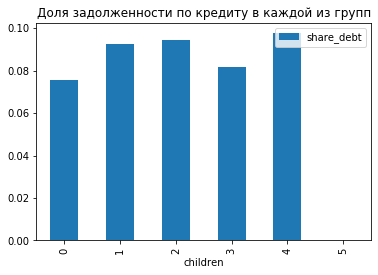

In [29]:
df_child_debt.plot(y='share_debt', kind='bar', title='Доля задолженности по кредиту в каждой из групп')

**Вывод:**
По группе клиентов, у которых 5 детей - нет клиентов, у которых была бы просрочка.
В группе людей, у которых нет детей или три ребенка , просчроку допускают 8 процентов клиентов.
в остальных группах (1,2,4 ребенка) -  просрочку допускают 9 процентов клиентов.
Прямой зависимости возврата кредита в срок с количеством детей я не наблюдаю.


###  Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [30]:
df_family_debt = df.groupby('family_status_id').agg({'debt':['count', 'sum']})
df_family_debt['share_debt'] = df_family_debt['debt']['sum'] / df_family_debt['debt']['count']
df_family_debt

debt      share_debt
                  count  sum           
family_status_id                       
0                 12261  927   0.075606
1                  4134  385   0.093130
2                   951   63   0.066246
3                  1189   84   0.070648
4                  2796  273   0.097639

   family_status_id          family_status
0                 0        женат / замужем
1                 1       гражданский брак
2                 2         вдовец / вдова
3                 3              в разводе
4                 4  Не женат / не замужем


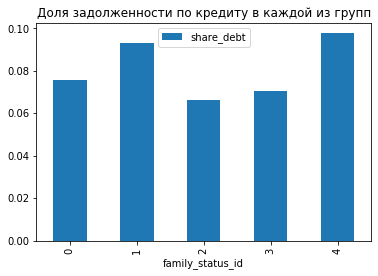

In [31]:
print(df_family_status)
df_family_debt.plot(y='share_debt', kind='bar', title='Доля задолженности по кредиту в каждой из групп')

**Вывод:**
Клиенты из группы 1 и 4 не возвращали кредит в срок чаще остальных - 9%.
Клиенты из группы 2 и 3 меньше всех допустили просрочку в возврате кредита - 7%.

Зависимость есть, но все же требуется больше данных и лучше бы что бы клиентов в каждой категориии было примерно одинаковое количество.

###  Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [32]:
df_total_income_debt = df.groupby('total_income_category').agg({'debt':['count', 'sum']})
df_total_income_debt['share_debt'] = df_total_income_debt['debt']['sum'] / df_total_income_debt['debt']['count']
df_total_income_debt

debt       share_debt
                       count   sum           
total_income_category                        
A                         25     2   0.080000
B                       5013   354   0.070616
C                      15922  1353   0.084977
D                        349    21   0.060172
E                         22     2   0.090909

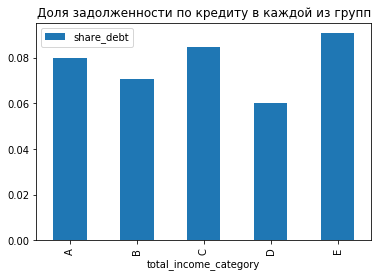

In [33]:
df_total_income_debt.plot(y='share_debt', kind='bar', title='Доля задолженности по кредиту в каждой из групп')

**Вывод:**
Клиенты в категории D возвращают кредит в срок лучше других категорий. у них самый низкий показатель просрочки- 6%.
Самый худший показатель возврата кредита в срок у клиентов категории Е - 9%.


###  Как разные цели кредита влияют на его возврат в срок?

In [34]:
df_purpose_debt = df.groupby('purpose_category').agg({'debt':['count', 'sum']})
df_purpose_debt['share_debt'] = df_purpose_debt['debt']['sum'] / df_purpose_debt['debt']['count']
df_purpose_debt

debt      share_debt
                          count  sum           
purpose_category                               
операции с автомобилем     4279  400   0.093480
операции с недвижимостью  10751  780   0.072551
получение образования      3988  369   0.092528
проведение свадьбы         2313  183   0.079118

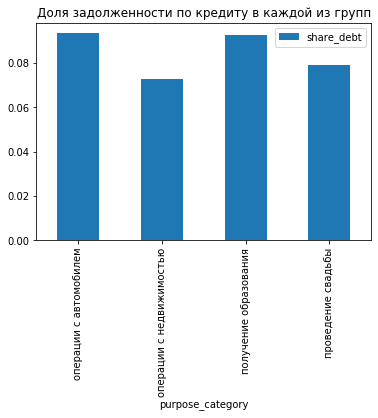

In [35]:
df_purpose_debt.plot(y='share_debt', kind='bar', title='Доля задолженности по кредиту в каждой из групп')

**Вывод:**
Клиенты, которые брали кредит на автомобиль или образование, допускали просрочку по кредиту больше других. Таких клиентов - 9%.
Клиенты, которые брали кредит на недвижимость или на свадьбу, возвращали кредит немного лучше. Доля просрочки у них - 7%.


## Общий вывод:

Опираясь на предоставленную выгрузку, и обобщая все вышесказанное, можно предположить, что:

- <font color='green'>Прямой зависимости возврата кредита от количества детей в семье я не наблюдаю. Клиенты, у которых нет детей допускают просрочку в 7% случаев, тогда как клиенты, у которых есть дети, допускают просрочку в 9% случаев. Разница небольшая.</font>
- <font color='red'>Клиенты, находящиеся в категории "гражданский брак" и "не замужем/не женат" допускают просрочек по кредиту чаще остальных</font>
- <font color='green'>Клиенты, находящиеся в категории "вдовец / вдова" и "в разводе" реже допускают просрочку по кредиту</font>
- <font color='green'>Клиенты, чей средний ежемесячный доход от 30тыс - 50 тыс(категория D) допускают просрочку меньше остальных - всего 6% людей из данной группы.</font>
- <font color='green'>Клиенты, которые брали кредит на автомобиль или образование допускают просрочку чаще на 2%, чем клиенты которые брали кредит на недвижимость или на свадьбу </font>
